<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **주성분 분석**

차원 축소에 대해 이해하고 차원 축소 알고리즘 중 하나인 PCA(주성분 분석) 모델 만들기

## 차원과 차원 축소

특성 : 데이터가 가진 속성(과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있는 셈)<br>
머신러닝에서는 이런 특성을 차원이라고도 부른다. 10,000개의 특성은 결국 10,000개의 차원이라는 건데, 이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있다.<br>

차원 축소 : 비지도 학습 작업 중 하나로, 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법 / 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이며 복원할 수도 있다.<br>

**PCA(주성분 분석, principal component analysis)** : 대표적인 차원 축소 알고리즘

## 주성분 분석 소개

데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있다.<br>
**분산** : 데이터가 널리 퍼져있는 정도 / 관측값과 평균의 오차 제곱들을 다 더한 후 평균을 낸다.<br>
분산이 큰 방향(가장 널리 퍼져있는 방향)이란 데이터를 잘 표현하는 어떤 벡터라고 생각할 수 있다. 2차원 데이터를 예로 들어보면 해당 데이터는 x, y 2개의 특성(차원)이 존재한다.<br>
<img src = "https://t1.daumcdn.net/cfile/tistory/9930DD365B4F02B410" height = 250 width = 300><br>
위의 그림을 보면 데이터들이 대각선 방향으로 길게 늘어진 형태를 가지고 있고, 이 대각선 방향이 분산이 가장 크다고 할 수 있다.<br>
위의 빨간 직선이 원점에서 출발한다면 두 원소로 이루어진 벡터로 쓸 수 있다.(실제로 사이킷런의 PCA 모델을 훈련하면 자동으로 특성마다 평균값을 빼서 원점에 맞춰준다.)<br>

**주성분** : 분산이 큰 방향, 즉 데이터의 분포를 가장 잘 표현하는 방향을 나타내는 벡터(위의 빨간 직선)<br>
주성분 벡터는 원본 데이터에 있는 어떤 방향이기 때문에 주성분 벡터의 원소 개수(차원 수)는 원본 데이터셋에 있는 특성 개수(차원 수)와 같다.<br>
원본 데이터는 주성분을 사용해 차원을 줄일 수 있다.<br>
<img src = "https://mblogthumb-phinf.pstatic.net/MjAxODEwMjdfMjkg/MDAxNTQwNjQyODEwMzQx.jti8Z4r69jPSUVEUH0fw4qQ8PBAklHN6GNdB8pBKpKUg.pn67kXx3C3RmU707zfkhgwuIxNMjkvEVZ0ovs8yOEBIg.PNG.fapeople0808/%EC%BA%A1%EC%B2%98.PNG?type=w800" height = 250 width = 550><br>
위의 그림처럼 각 샘플들을 주성분에 직각으로 투영하는 것이다.<br>
주의할 점은 주성분은 원본 차원과 같고(위에서는 2차원), 주성분으로 바꾼 데이터는 차원이 줄어든다(위에서는 1차원)는 것이다.<br>
<img src = "https://blog.kakaocdn.net/dn/bUvtbN/btrowkIz2oH/pFi7dcwZI0DolbyEpKTHPk/img.png" height = 250 width = 550><br>
주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있다.

첫 번째 주성분(P1)을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다. 이 벡터가 두 번째 주성분이다.<br>
<img src = "https://wikidocs.net/images/page/34042/pca_new.jpg" height = 250 width = 550><br>
위의 예는 2차원이기 때문에 두 번째 주성분의 방향은 하나뿐(P2)이다.<br>

일반적으로 주성분은 원본 특성의 개수(차원 수)만큼 찾을 수 있다.

## PCA 클래스

사이킷런으로 과일 사진 데이터에서 주성분 분석을 해보자

In [40]:
# 데이터셋 불러오기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) # 훈련을 위해 3차원 -> 2차원으로 변경

--2023-10-06 13:33:13--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-06 13:33:13--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-06 13:33:13--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

사이킷런은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공한다.<br>
PCA 클래스 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 한다.<br>
k-평균과 마찬가지로 비지도 학습이기 때문에 fit() 메서드에 타깃값을 제공하지 않는다.

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 주성분 개수 50으로 지정
pca.fit(fruits_2d)

PCA(n_components=50)

PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있다.

In [64]:
# PCA 클래스가 찾은 주성분 배열 크기 확인
print(pca.components_.shape)

(50, 10000)


n_components=50으로 지정했기 때문에 첫 번째 차원이 50이다.<br>
두 번째 차원은 항상 원본 데이터의 특성 개수(차원 수)와 같은 10,000이다.

원본 데이터와 같기 때문에 주성분을 100 x 100 크기의 이미지처럼 출력할 수 있다.

In [65]:
# 이미지 출력하는 함수
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1): # arr : 3차원 배열(샘플 개수, 너비, 높이)
  n = len(arr) # n : 샘플 개수
  # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수 계산
  rows = int(np.ceil(n/10)) # np.ceil : 숫자를 무조건 올림하는 함수(샘플이 10개 이하이면 행의 개수는 1)
  # 행이 1개면 열의 개수는 샘플 개수, 그렇지 않으면 10개
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j <  n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

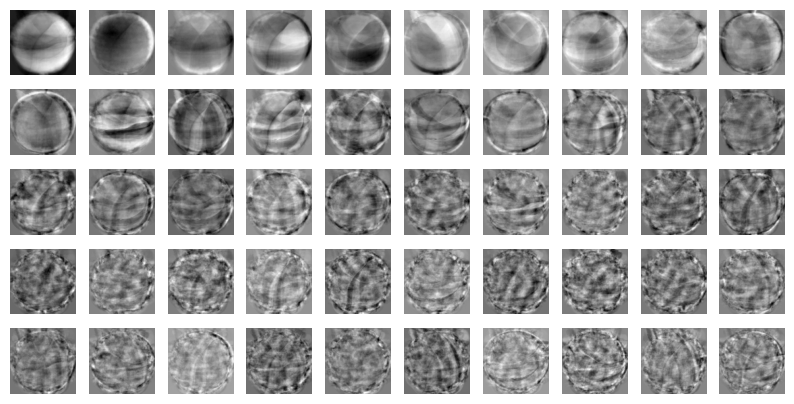

In [66]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.<br>
PCA의 transform() 메서드를 사용해 차원을 축소해보자.

In [67]:
# 원본 데이터 특성 개수(차원 수)
print(fruits_2d.shape)

(300, 10000)


In [68]:
# 차원 축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


이제 fruits_pca 배열은 50개의 특성을 가진 데이터이다.<br>
fruits_2d 대신 fruits_pca를 저장한다면 훨씬 공간을 줄일 수 있다.<br>
이제 다시 원상 복구해보자.

## 원본 데이터 재구성

10,000개의 특성을 50개로 줄였기 때문에 어느 정도 손실이 발생할 수밖에 없다. 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.

PCA 클래스는 이를 위해 inverse_transform() 메서드를 제공한다.

In [69]:
# 차원 복구
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


이 데이터를 100 x 100 크기로 바꾸어 100개씩 나누어 출력해보자.<br>
데이터 순서는 사과, 파인애플, 바나나 순이다.

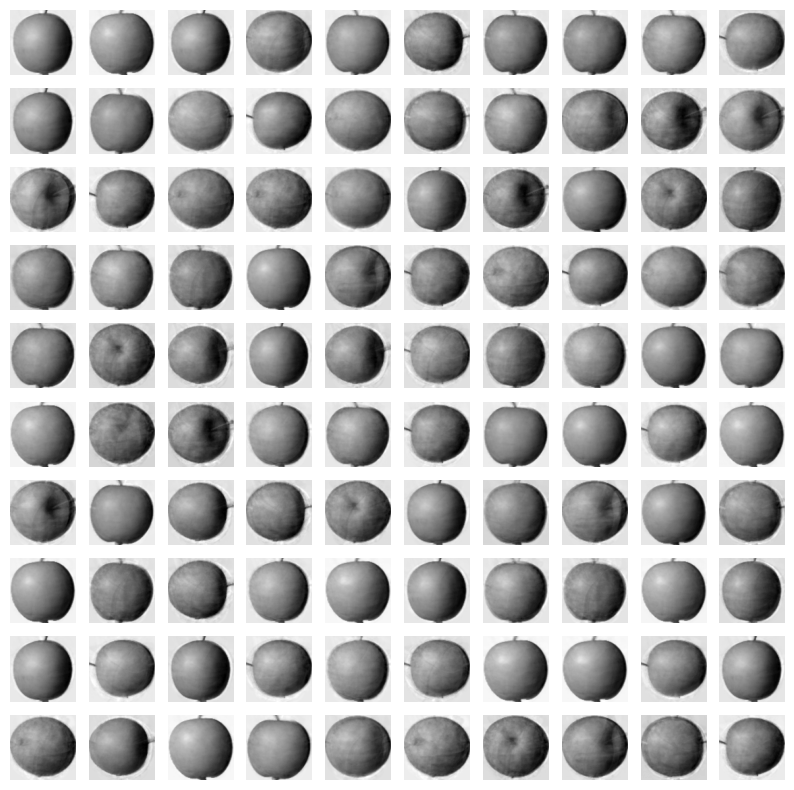

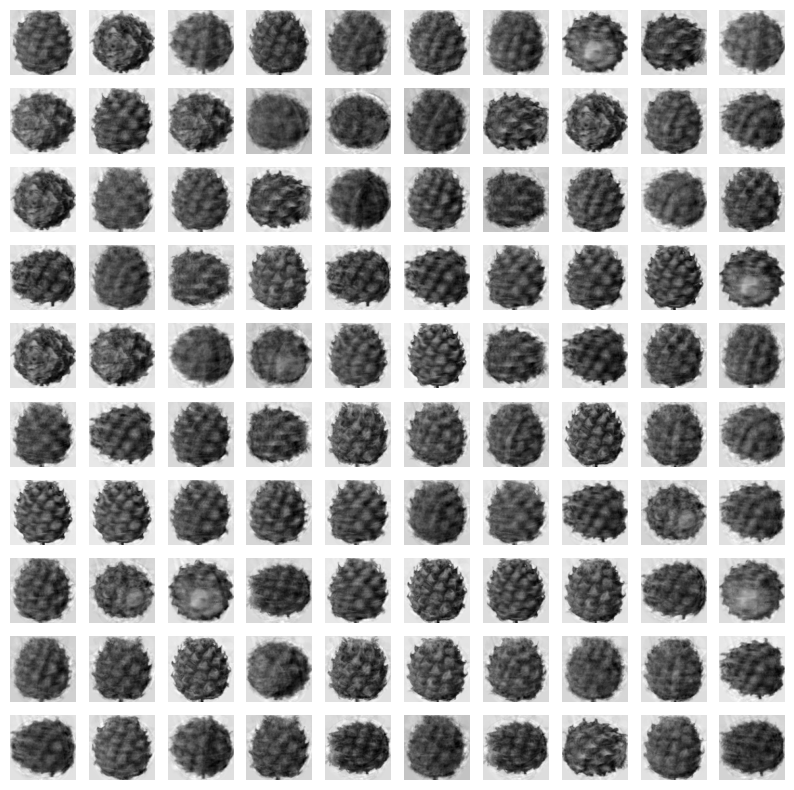

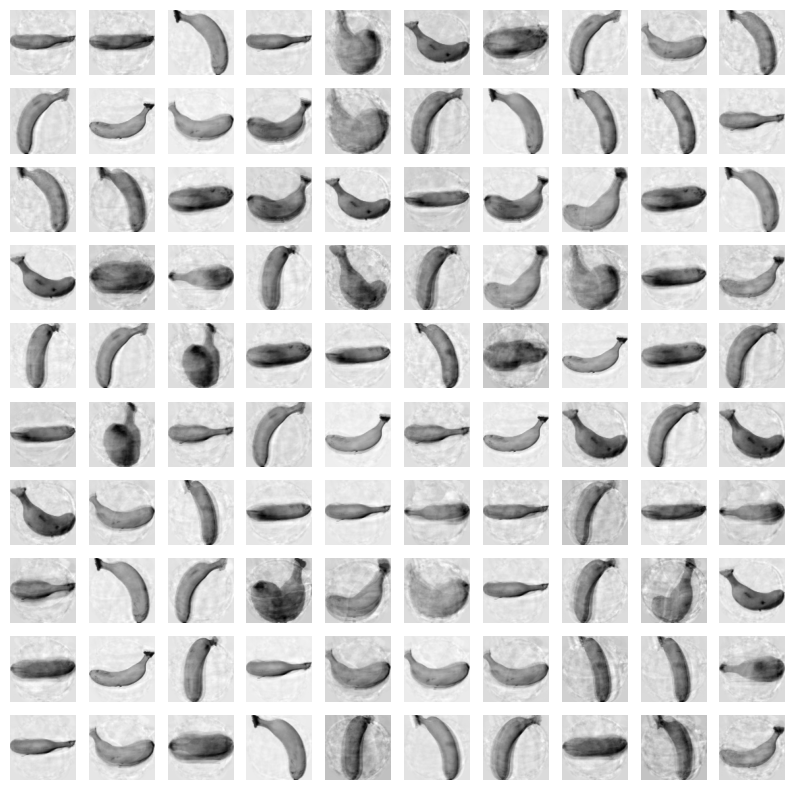

In [70]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

거의 모든 과일이 잘 복원되었지만, 일부 흐리고 번진 부분이 있다.<br>

주성분을 최대로 사용한다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다.<br>

50개의 특성은 얼마나 분산을 보존하고 있을까?

## 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값<br>

PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다.<br>
당연히 첫 번째 주성분의 설명된 분산이 가장 크다.(주성분 분석은 가장 분산이 큰 방향부터 순서대로 찾기 때문)<br>
이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [73]:
# 각 주성분의 분산 비율
print(pca.explained_variance_ratio_)

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645189 0.00578896 0.00511202
 0.00486382 0.00480345 0.00447834 0.00437318 0.00408041 0.00389473
 0.00372443 0.00359286 0.00331458 0.00317848 0.00304251 0.00303768
 0.00288779 0.00275904 0.00264982 0.00255872 0.00252037 0.00247301
 0.00239506 0.00230848 0.00222126 0.00216385 0.00214172 0.00196187
 0.00192678 0.00191104 0.00184671 0.00180927 0.00173103 0.00168043
 0.00163136 0.00161875]


In [74]:
# 분산 비율의 합
print(np.sum(pca.explained_variance_ratio_))

0.9215737877785799


92%가 넘는 분산을 유지하고 있다.<br>

설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는 데 도움이 된다.

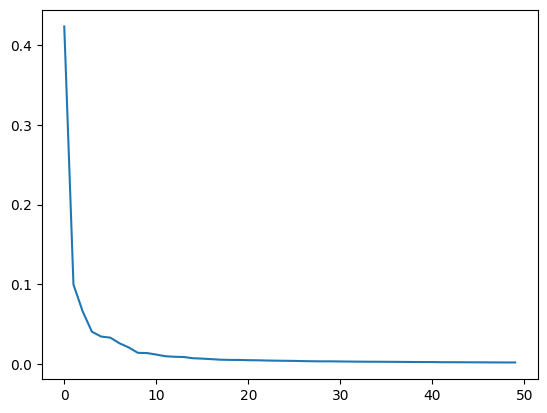

In [75]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

위의 그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하고 있다.

## 다른 알고리즘과 함께 사용하기

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아보자.<br>

3개의 과일 사진을 분류해야 하므로(지도 학습에 사용할 타깃이 필요하니까) 간단히 로지스틱 회귀 모델을 사용하자.

In [76]:
# 로지스틱 회귀 객체 생성
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [77]:
# 타깃값 준비(사과 : 0, 파인애플 : 1, 바나나 : 2)
target = np.array([0]*100 + [1]*100 + [2]*100) # fruits 데이터셋 내에 사과, 파인애플, 바나나가 100개씩 순서대로 있기 때문

먼저 원본 데이터인 fruits_2d 사용<br>
로지스틱 회귀 모델의 성능을 가늠해보기 위해 cross_validate()로 교차 검증을 수행해보자.

In [78]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # fit_time : 교차 검증 폴드의 훈련 시간

0.9966666666666667
1.977836513519287


10,000개의 특성을 사용했기 때문에 300개의 샘플에서는 과대적합된 모델을 만들기 쉽다.

이번엔 PCA로 축소한 데이터인 fruits_pca 사용

In [79]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03893733024597168


50개의 특성만 사용했는데도 정확도가 100%이고, 훈련 시간도 많이 감소했다.<br>
PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있다.

앞서 PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정했는데, 이 대신 원하는 설명된 분산의 비율을 입력할 수도 있다. 이러면 PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.

In [80]:
# 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 만들기
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [81]:
# 찾은 주성분 개수 확인
print(pca.n_components_)

2


-> 단 두 개의 주성분만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다.

In [82]:
# 해당 모델로 원본 데이터 변환하기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


2개의 특성만 사용하고도 교차 검증의 결과가 좋을지 확인해보자

In [83]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03346328735351563


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

단 2개의 특성을 사용했을 뿐인데 99%의 정확도를 달성했다.

이번에는 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보자.

In [84]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


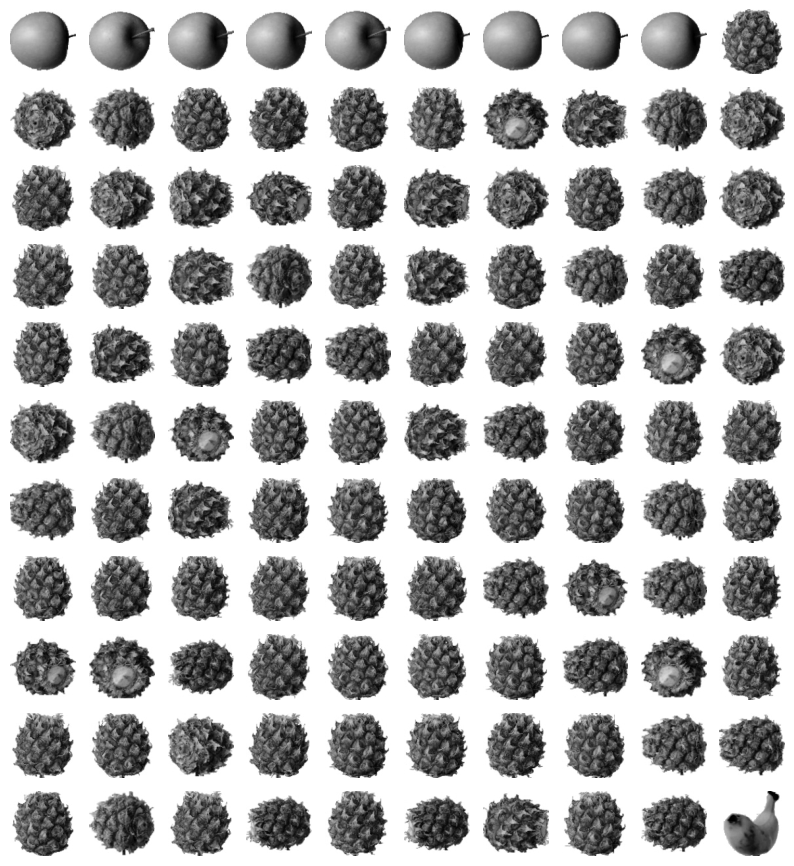

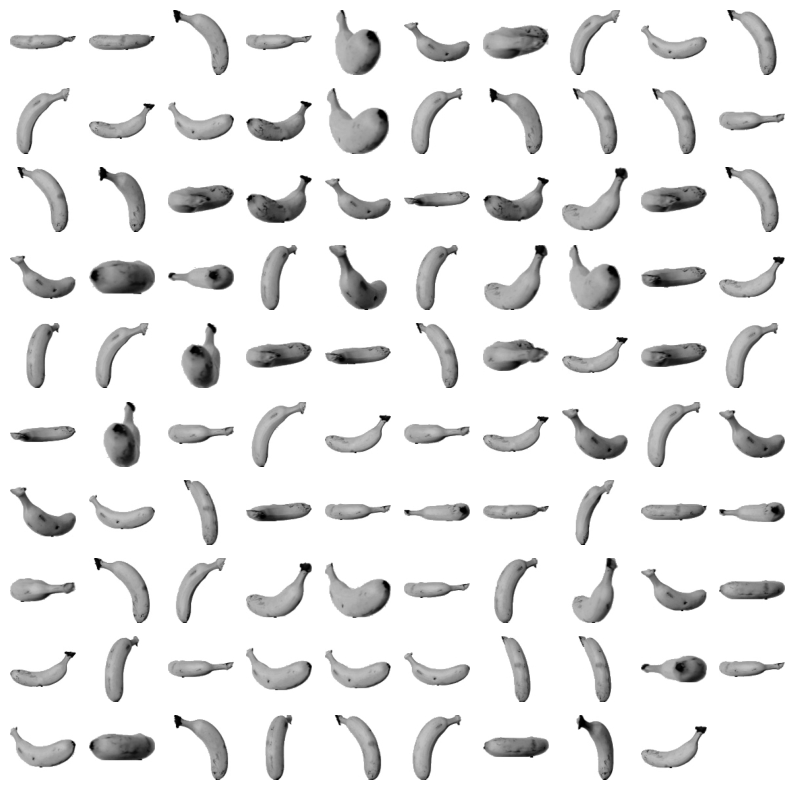

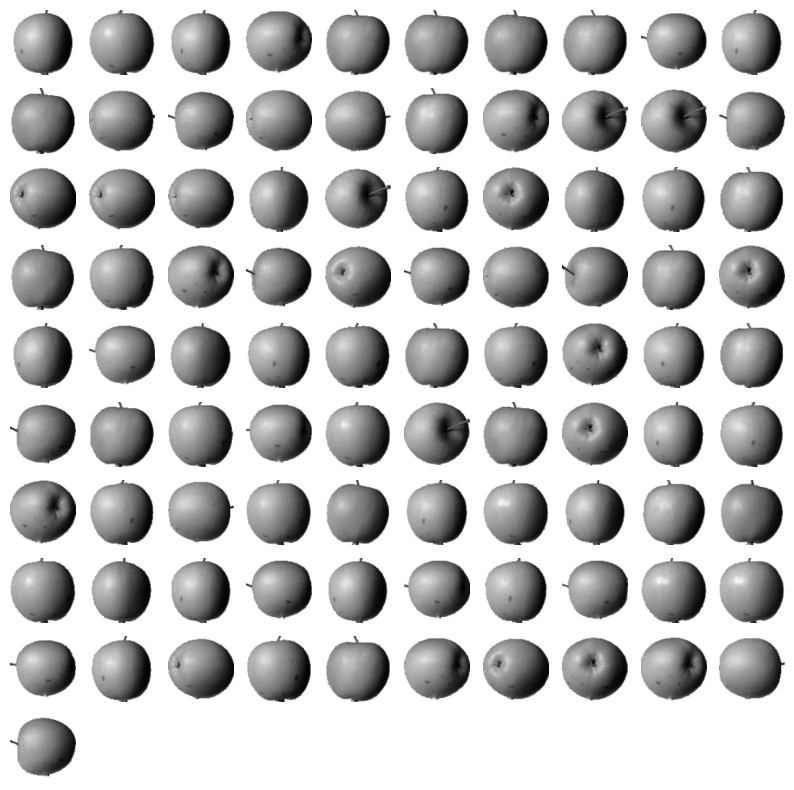

In [85]:
# KMeans가 찾은 레이블을 활용해 과일 이미지 출력
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

훈련 데이터의 차원을 줄임으로써 얻을 수 있는 또 다른 장점은 **시각화**이다. 3개 차원 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다.<br>

fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있다.

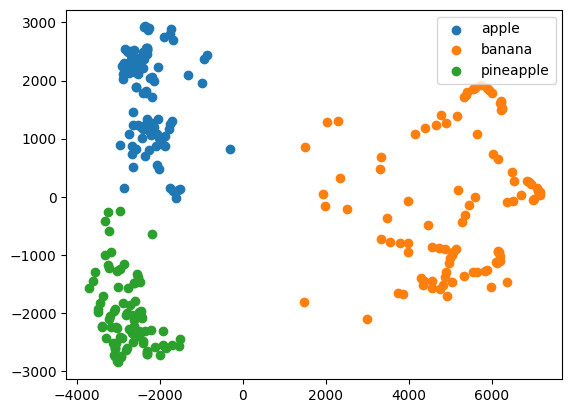

In [86]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

해당 그래프를 보니 사과와 파인애플 클러스터의 경계가 가깝게 붙어 있다. 위의 이미지 출력에서 사과와 파인애플이 섞여서 출력된 이유가 여기 있다.<br>

데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있다. 그런 면에서 차원 축소는 매우 유용한 도구 중 하나이다.